In [1]:
from six.moves import urllib
from sklearn.datasets import fetch_mldata

from scipy.io import loadmat
mnist_alternative_url = "https://github.com/amplab/datascience-sp14/raw/master/lab7/mldata/mnist-original.mat"
mnist_path = "./mnist-original.mat"
response = urllib.request.urlopen(mnist_alternative_url)
with open(mnist_path, "wb") as f:
    content = response.read()
    f.write(content)
mnist_raw = loadmat(mnist_path)
mnist = {
    "data": mnist_raw["data"].T,
    "target": mnist_raw["label"][0],
    "COL_NAMES": ["label", "data"],
    "DESCR": "mldata.org dataset: mnist-original",
}
print("Success!")

Success!


In [2]:
mnist

{'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original'}

In [3]:
X,y=mnist["data"],mnist["target"]

In [4]:
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

In [6]:
%matplotlib inline
import matplotlib 

In [7]:
import matplotlib.pyplot as plt


In [8]:
some_digit=X[36000]
some_digit_image=some_digit.reshape(28,28)

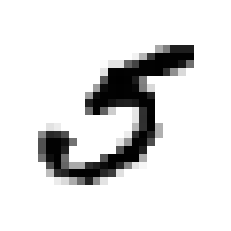

In [9]:
plt.imshow(some_digit_image,cmap=matplotlib.cm.binary,interpolation="nearest")
plt.axis("off")
plt.show()

In [10]:
y[36000]

5.0

In [11]:
X_train,X_test,y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:]

In [12]:
import numpy as np

In [13]:
shuffle_index=np.random.permutation(60000)
X_train,y_train=X_train[shuffle_index],y_train[shuffle_index]

In [14]:
y_train_5=(y_train==5)
y_test_5=(y_test==5)

In [15]:
from sklearn.linear_model import SGDClassifier

In [16]:
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)
sgd_clf.predict([some_digit])



array([ True])

In [17]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
skfolds = StratifiedKFold(n_splits=3, random_state=42)
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9518
0.95895
0.96565


In [18]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring='accuracy')

array([0.9518 , 0.95895, 0.96565])

In [19]:
from sklearn.model_selection import cross_val_predict
y_train_pred=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_pred)

array([[54216,   363],
       [ 2109,  3312]])

In [21]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5,y_train_pred)

0.9012244897959184

In [22]:
recall_score(y_train_5,y_train_pred)

0.6109573879358052

In [23]:
from sklearn.metrics import f1_score

In [24]:
f1_score(y_train_5,y_train_pred)

0.7282321899736147

In [25]:
y_scores=sgd_clf.decision_function([some_digit])
y_scores

array([2275.30524621])

In [26]:
threshold=0
y_some_digit_pred=(y_scores>threshold)

In [27]:
y_some_digit_pred

array([ True])

In [28]:
y_scores=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,method="decision_function")

In [31]:
from sklearn.metrics import precision_recall_curve
precisions,recalls,thresholds=precision_recall_curve(y_train_5,y_scores)

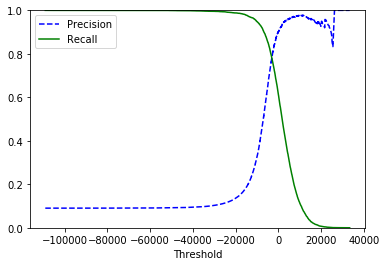

In [32]:
def plot_precisions_recall_vs_threshold(precision,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],"b--",label='Precision')
    plt.plot(thresholds,recalls[:-1],"g-",label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0,1])
    
plot_precisions_recall_vs_threshold(precisions,recalls,thresholds)
plt.show()

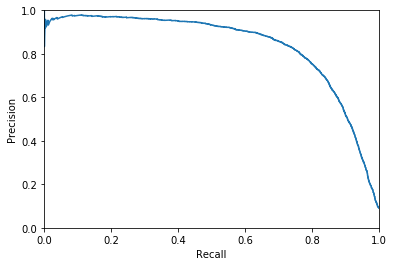

In [34]:
plt.plot(recalls,precisions)
plt.ylim([0,1])
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim([0,1])
plt.show()

In [39]:
y_train_pred_90=(y_scores>15000)

In [40]:
precision_score(y_train_5,y_train_pred_90)

0.9590643274853801

In [41]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_train_5,y_scores)

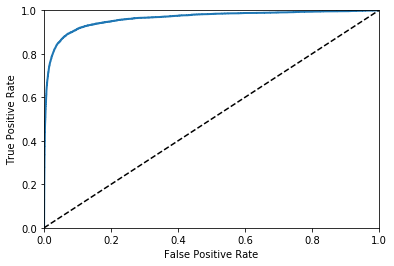

In [43]:
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr,tpr)
plt.show()

In [45]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,y_scores)

0.9624958207119026

In [46]:
sgd_clf.fit(X_train,y_train)
sgd_clf.predict([some_digit])

array([5.])

In [47]:
some_digit_scores=sgd_clf.decision_function([some_digit])
some_digit_scores

array([[ -8022.25745046, -19444.22302365, -10750.65543881,
          -476.00664048, -20583.3533925 ,   4053.67434806,
        -29219.03956384, -20399.26557792,  -6770.07466668,
        -15633.92859513]])

In [49]:
np.argmax(some_digit_scores)

5

In [51]:
sgd_clf.classes_

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf,X_train_scaled,y_train,cv=3,scoring="accuracy")

In [ ]:
y_train_pred=cross_val_predict(sgd_clf,X_train_scaled,y_train,cv=3)
conf_mx=confusion_matrix(y_train_pred)
conf_mx

In [ ]:
plt.matshow(conf_mx,cmap=cm.gray)
plt.show()